### Problem Statement: House Price Prediction
#### Description:- 
House price prediction is a common problem in the real estate industry andinvolves predicting the selling price of a house based on various features and attributes. Theproblem is typically approached as a regression problem, where the target variable is the price of the house, and the features are various attributes of the house The features used in house price prediction can include both quantitative and categorical variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to main road, and various amenities such as a garage and other factors that may influence the value of the property. Accurate predictions can help agents and appraisers price homes correctly, while homeowners can use the predictions to set a reasonable asking price for their properties. Accurate house price prediction can also be useful for buyers who are looking to make informed decisions about purchasing a property and obtaining a fair price for their investment.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('Housing.csv')
df = df.dropna()

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [38]:
df.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

In [39]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

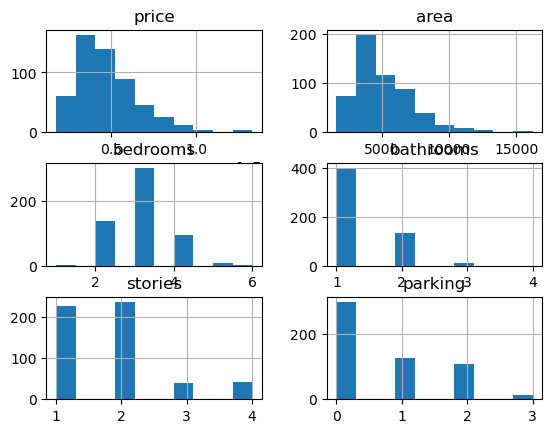

In [40]:
df.hist()

<Axes: xlabel='guestroom', ylabel='price'>

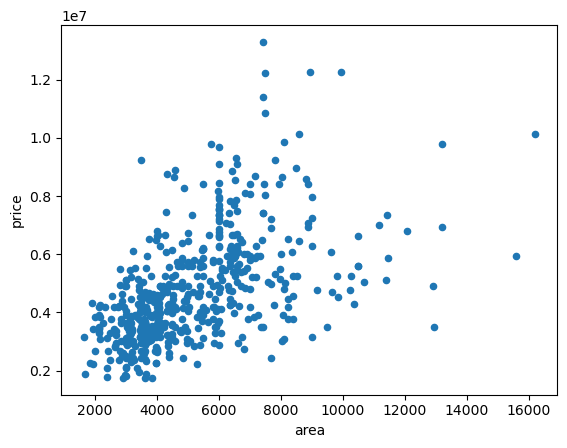

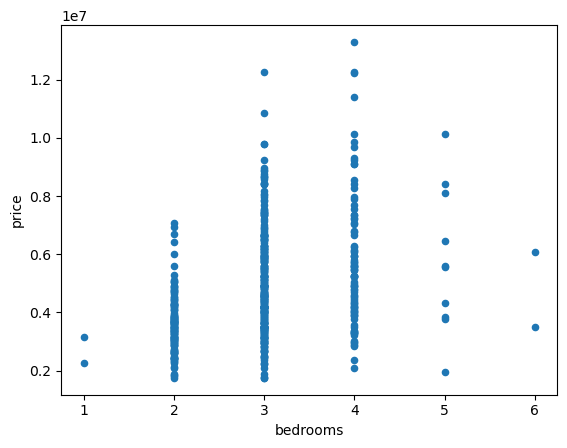

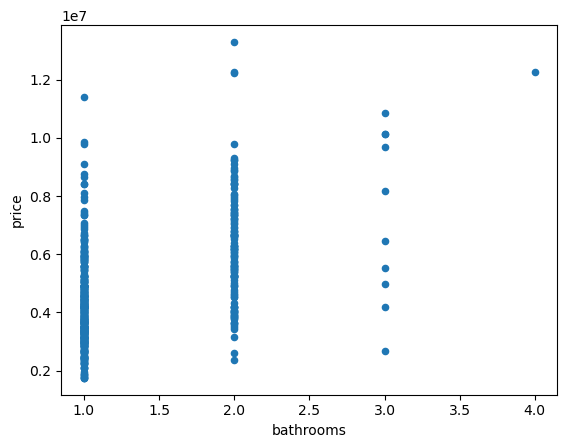

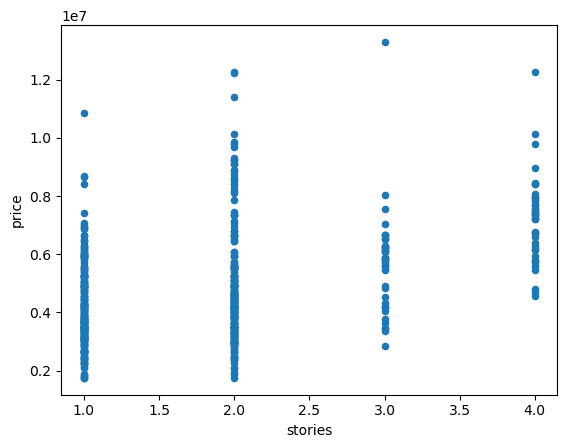

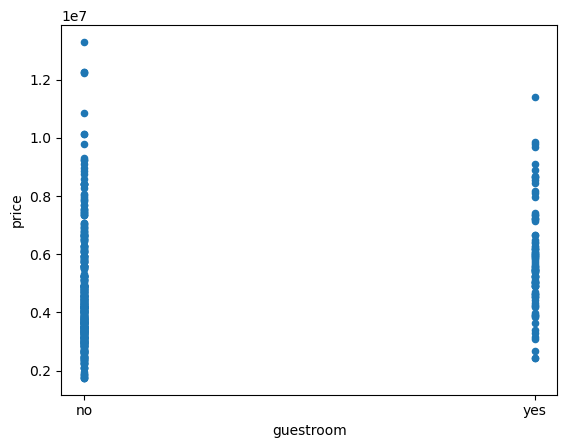

In [41]:
df.plot(x='area', y='price', kind='scatter')
df.plot(x='bedrooms', y='price', kind='scatter')
df.plot(x='bathrooms', y='price', kind='scatter')
df.plot(x='stories', y='price', kind='scatter')
df.plot(x='guestroom', y='price', kind='scatter')

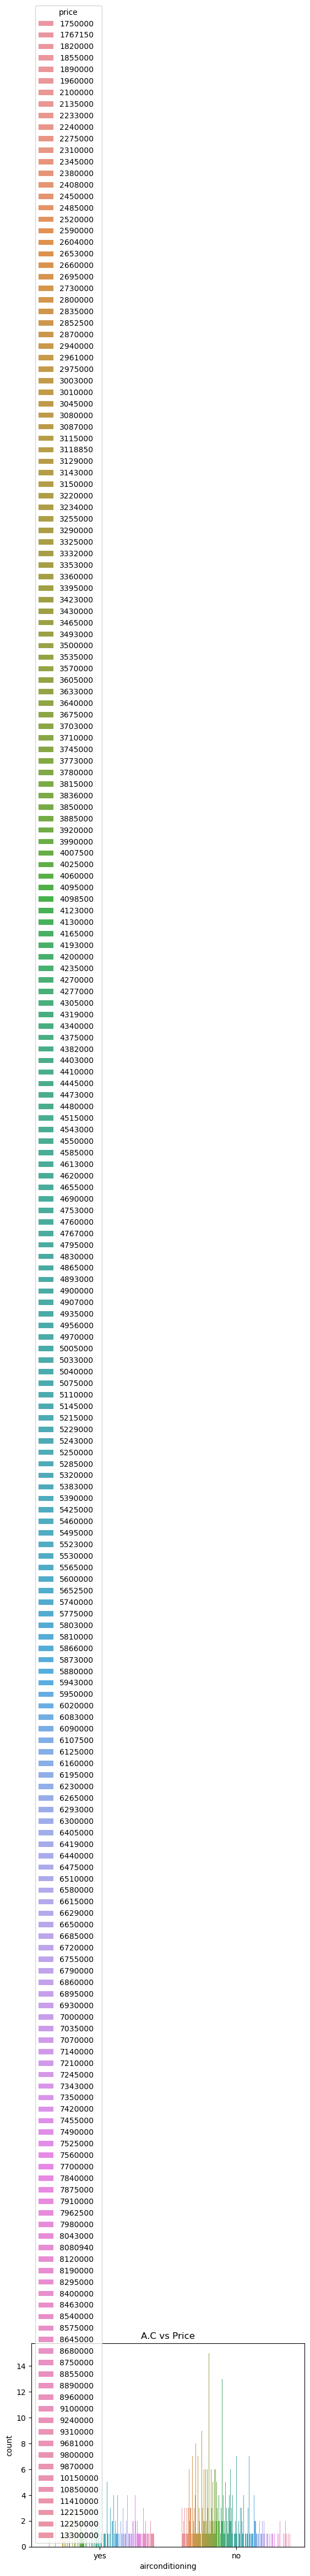

In [42]:
sns.countplot(x='airconditioning', hue='price', data=df)
plt.title('A.C vs Price')
plt.show()

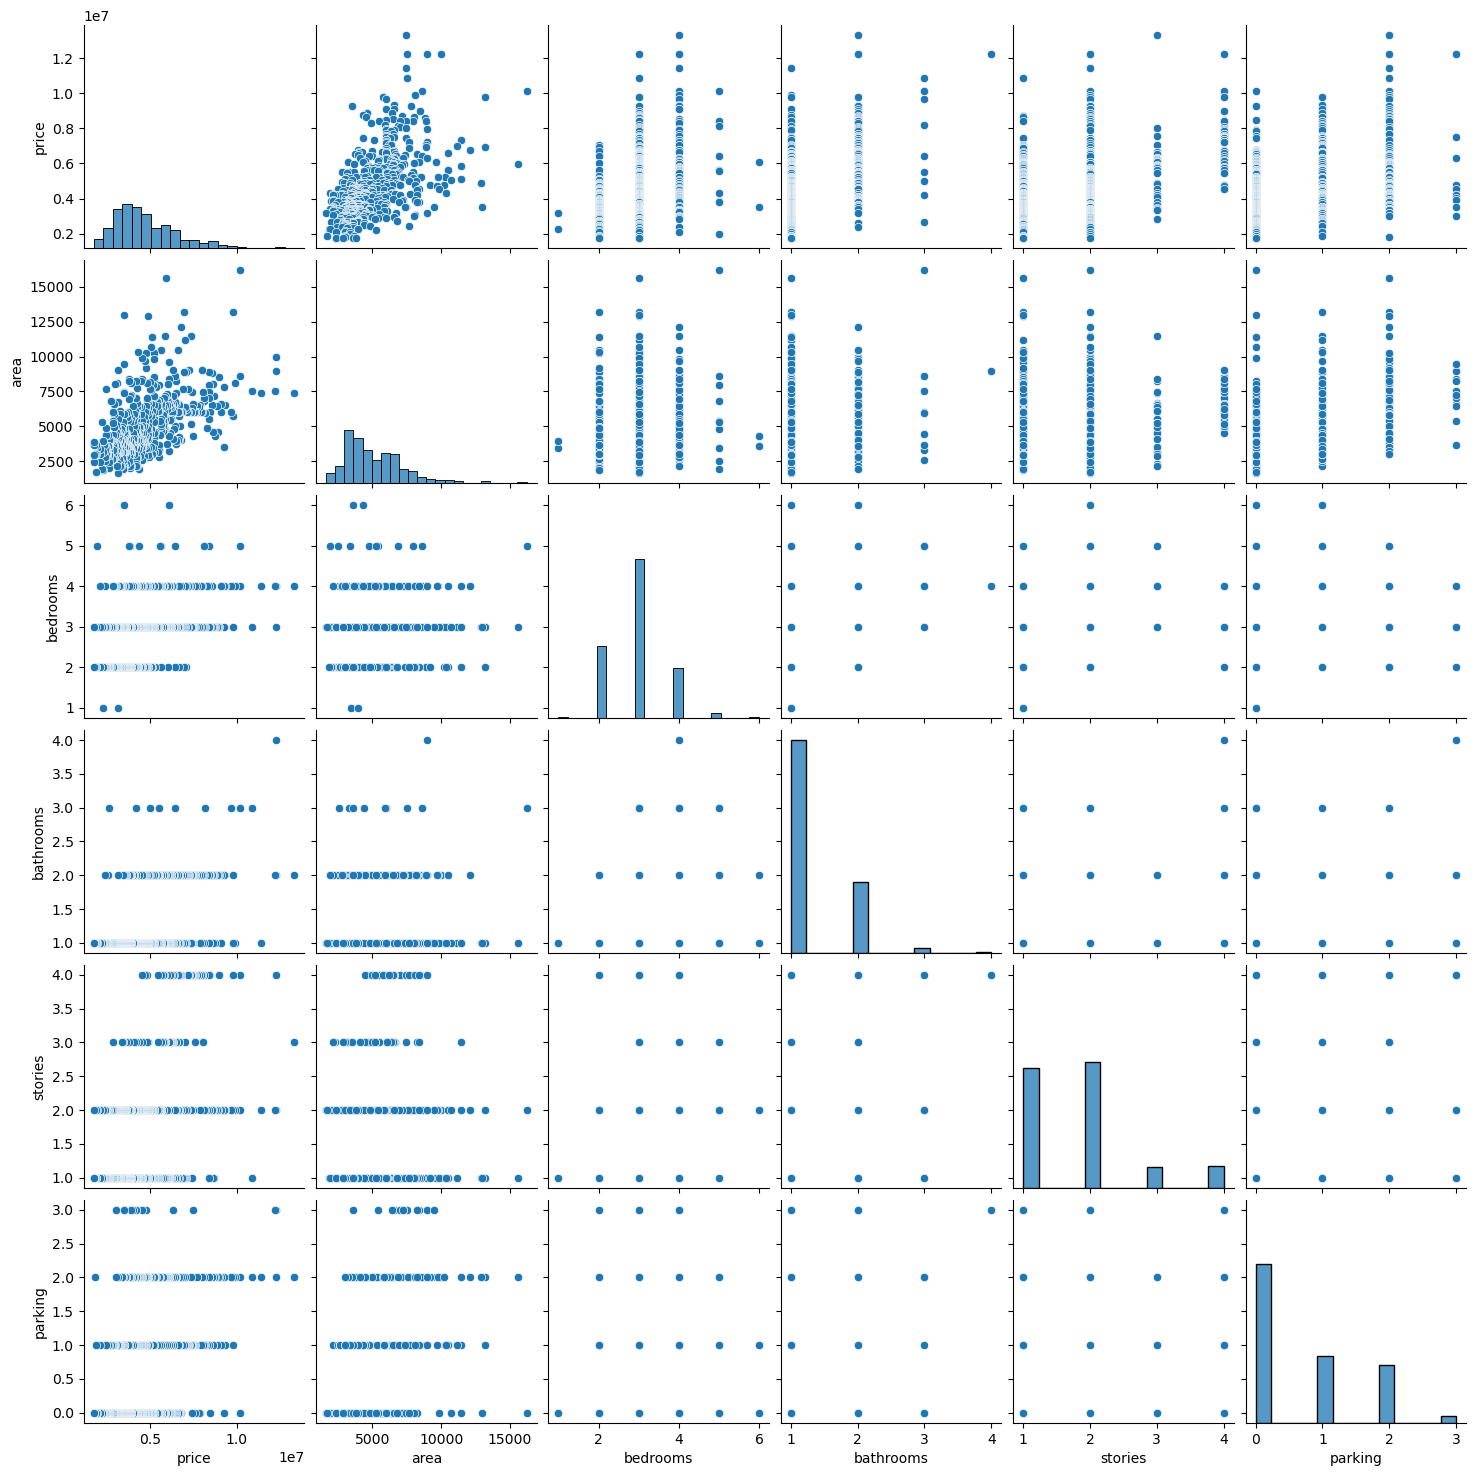

In [43]:
sns.pairplot(df)

In [87]:
df.isnull().sum()

price        0
area         0
bedrooms     0
bathrooms    0
stories      0
parking      0
dtype: int64

In [89]:
df = df.dropna()

In [90]:
df = df[np.abs(df - df.mean()) <= 3 * df.std()]

In [92]:
df = pd.get_dummies(df)
df.head(20)

,price,area,bedrooms,bathrooms,stories,parking
0,9310000.0,6550.0,4.0,2.0,2,1
1,9240000.0,3500.0,4.0,2.0,2,2
2,9240000.0,7800.0,3.0,2.0,2,0
3,9100000.0,6000.0,4.0,1.0,2,2
4,9100000.0,6600.0,4.0,2.0,2,1
5,8960000.0,8500.0,3.0,2.0,4,2
6,8890000.0,4600.0,3.0,2.0,2,2
7,8855000.0,6420.0,3.0,2.0,2,1
8,8750000.0,4320.0,3.0,1.0,2,2
9,8680000.0,7155.0,3.0,2.0,1,2


In [93]:
X = df.drop('price', axis=1)
y = df['price']

In [94]:
X,y

(       area  bedrooms  bathrooms  stories  parking
 0    6550.0       4.0        2.0        2        1
 1    3500.0       4.0        2.0        2        2
 2    7800.0       3.0        2.0        2        0
 3    6000.0       4.0        1.0        2        2
 4    6600.0       4.0        2.0        2        1
 ..      ...       ...        ...      ...      ...
 511  3000.0       2.0        1.0        1        2
 512  2400.0       3.0        1.0        1        0
 513  3620.0       2.0        1.0        1        0
 514  2910.0       3.0        1.0        1        0
 515  3850.0       3.0        1.0        2        0
 
 [516 rows x 5 columns],
 0      9310000.0
 1      9240000.0
 2      9240000.0
 3      9100000.0
 4      9100000.0
          ...    
 511    1820000.0
 512    1767150.0
 513    1750000.0
 514    1750000.0
 515    1750000.0
 Name: price, Length: 516, dtype: float64)

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
X

array([[ 0.92663124,  1.52666328,  1.7501406 ,  0.24155815,  0.41038234],
       [-0.78794959,  1.52666328,  1.7501406 ,  0.24155815,  1.60003003],
       [ 1.6293283 ,  0.10471698,  1.7501406 ,  0.24155815, -0.77926535],
       ...,
       [-0.72049067, -1.31722933, -0.57138266, -0.91255303, -0.77926535],
       [-1.1196226 ,  0.10471698, -0.57138266, -0.91255303, -0.77926535],
       [-0.59119441,  0.10471698, -0.57138266,  0.24155815, -0.77926535]])

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [98]:
X_train,y_train

(array([[ 2.23645856, -1.31722933, -0.57138266, -0.91255303,  0.41038234],
        [-0.96784003,  0.10471698,  1.7501406 ,  0.24155815,  1.60003003],
        [-0.22579194,  0.10471698, -0.57138266,  0.24155815, -0.77926535],
        ...,
        [ 0.28014995, -1.31722933, -0.57138266,  0.24155815, -0.77926535],
        [ 0.98846858,  1.52666328,  1.7501406 ,  0.24155815,  0.41038234],
        [-0.45346578, -1.31722933, -0.57138266, -0.91255303,  1.60003003]]),
 47     7070000.0
 157    5215000.0
 298    4007500.0
 146    5250000.0
 6      8890000.0
          ...    
 412    3234000.0
 7      8855000.0
 205    4690000.0
 120    5652500.0
 420    3150000.0
 Name: price, Length: 387, dtype: float64)

In [99]:
X_test,y_test

(array([[-0.450655  ,  1.52666328, -0.57138266, -0.91255303, -0.77926535],
        [ 1.7979756 , -1.31722933, -0.57138266, -0.91255303,  0.41038234],
        [ 0.63993084,  0.10471698, -0.57138266, -0.91255303,  1.60003003],
        [-0.29887243,  0.10471698, -0.57138266,  0.24155815, -0.77926535],
        [ 0.84230759,  0.10471698, -0.57138266, -0.91255303,  0.41038234],
        [ 1.57311254, -1.31722933, -0.57138266, -0.91255303, -0.77926535],
        [-1.82794124,  0.10471698, -0.57138266,  0.24155815, -0.77926535],
        [ 0.61744454,  0.10471698,  1.7501406 ,  1.39566934, -0.77926535],
        [-0.51249234,  0.10471698, -0.57138266,  0.24155815, -0.77926535],
        [ 0.81982129, -1.31722933, -0.57138266, -0.91255303,  0.41038234],
        [-1.09544982,  0.10471698, -0.57138266,  0.24155815, -0.77926535],
        [-0.81605747,  0.10471698, -0.57138266,  0.24155815,  0.41038234],
        [-0.71486909,  1.52666328, -0.57138266,  0.24155815,  2.78967772],
        [ 0.56122877, -1.

### Model

In [108]:
df.dropna(inplace=True)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression()

In [109]:
model.fit(X_train_imputed, y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_test_imputed)

In [111]:
y_pred

array([3734042.0747122 , 3958919.36731464, 3382577.05494294,
       7807839.54908226, 3874679.52224624, 4953402.19325589,
       7471106.59322745, 3416758.12563742, 3039980.67712132,
       4037334.23462383, 3248925.18404867, 3847193.24493283,
       3725173.43276456, 6871008.53915889, 5107987.19886024,
       3809373.99428912, 5433453.75779078, 7585759.36850241,
       4156216.01706417, 7288248.74089749, 7682195.29184851,
       5527383.98955009, 4578940.24408409, 3484119.65152959,
       5391579.69161322, 3187982.31234026, 7294591.73089787,
       3377914.77440489, 3738877.28787743, 4250126.28846302,
       3934937.62086713, 5516457.28609934, 6129195.864844  ,
       6109494.09934475, 4311793.63647091, 3481890.72096737,
       3125590.48803288, 4341218.06108785, 4701494.5424685 ,
       4001743.91454234, 3940553.23166372, 6982087.91299266,
       4131626.80561246, 5398431.61916965, 4334499.78261475,
       4140495.4475601 , 6142648.220242  , 3154407.86731374,
       3204426.9384757 ,

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [113]:
mse

1568401225999.1897

In [114]:
mae

953867.8188284582

In [115]:
r2

0.4866992770798495

In [116]:
from sklearn.svm import SVR
model = SVR()

In [117]:
model.fit(X_train_imputed, y_train)

SVR()

In [118]:
y_pred = model.predict(X_test_imputed)

In [119]:
y_pred

array([4199988.00853672, 4199995.94430859, 4199981.47726149,
       4200045.93236713, 4200002.82919072, 4200034.24685066,
       4200049.59976501, 4200009.44080076, 4199974.3496879 ,
       4200023.28017063, 4199985.17819384, 4200019.90588145,
       4199993.95027063, 4200056.74173837, 4200043.37049899,
       4199994.60745425, 4200045.7657294 , 4200049.81441995,
       4200012.04795087, 4200042.5825437 , 4200038.07104403,
       4200043.69333234, 4200027.70516306, 4199989.48764838,
       4200039.88449515, 4199976.5785506 , 4200055.34247997,
       4199986.94050964, 4199994.50938418, 4200005.51380772,
       4199995.30293783, 4200046.2560705 , 4200054.88335717,
       4200050.457234  , 4200007.84005248, 4199988.5772398 ,
       4199984.66117116, 4200015.00173796, 4200032.76594771,
       4199997.15481123, 4200013.87664853, 4200056.19225941,
       4200013.08846991, 4200039.9817545 , 4200023.81824857,
       4200001.58328516, 4200047.43329334, 4199975.95157441,
       4199976.91058157,

In [120]:
mse2 = mean_squared_error(y_test, y_pred)
mae2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

In [121]:
mse2

3338519510112.755

In [122]:
mae2

1385910.5040233533

In [123]:
r2_2

-0.09261868048602828